In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [10]:
df=pd.read_csv("../Blood_Pressure.csv")

In [11]:
df.head()

,Patient_ID,Before,After
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [8]:
df.info()

In [9]:
df

'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_'

In [12]:
df.isnull().sum()

Patient_ID    0
Before        0
After         0
dtype: int64

In [13]:
x=df["Before"]

In [14]:
y=df["After"]

## Measure the dispersion in both and interpret the results

In [24]:

dispersion_before = np.std(df['Before'])  # Standard deviation of 'Before'
dispersion_after = np.std(df['After'])  # Standard deviation of 'After'
dispersion_before


6.853495458523336

In [25]:
dispersion_before

6.56520372875054

In [23]:
# Interpretation
print(f"Dispersion of 'Before': {dispersion_before:.2f}")
print(f"Dispersion of 'After': {dispersion_after:.2f}")

Dispersion of 'Before': 6.57
Dispersion of 'After': 6.85


### Calculate mean and 5% confidence interval and plot it in a graph

In [26]:
mean_before = np.mean(df['Before'])  # Mean of 'Before'
mean_after = np.mean(df['After'])  # Mean of 'After'


In [27]:
confidence_interval_before = stats.t.interval(0.95, len(df['Before'])-1, loc=mean_before, scale=stats.sem(df['Before']))
confidence_interval_after = stats.t.interval(0.95, len(df['After'])-1, loc=mean_after, scale=stats.sem(df['After']))


In [28]:
confidence_interval_before

(132.60075849172767, 135.21924150827232)

In [29]:
confidence_interval_after

(126.99326697818071, 129.7267330218193)

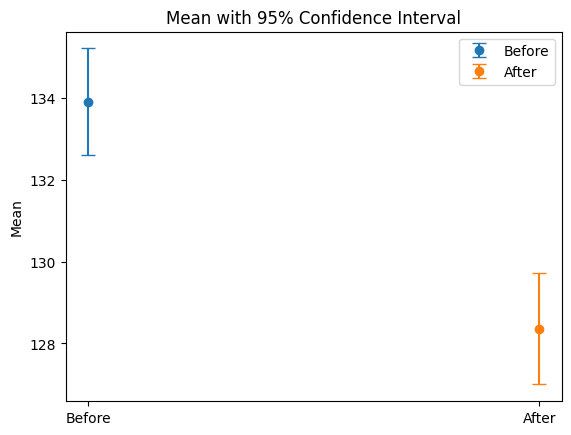

In [32]:
import  matplotlib.pyplot as plt
plt.errorbar(0, mean_before, yerr=(confidence_interval_before[1]-mean_before), fmt='o', capsize=5, label='Before')
plt.errorbar(1, mean_after, yerr=(confidence_interval_after[1]-mean_after), fmt='o', capsize=5, label='After')
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Mean')
plt.title('Mean with 95% Confidence Interval')
plt.legend()
plt.show()

In [33]:
# Interpretation
print(f"Mean of 'Before': {mean_before:.2f}")
print(f"5% Confidence Interval of 'Before': ({confidence_interval_before[0]:.2f}, {confidence_interval_before[1]:.2f})")
print(f"Mean of 'After': {mean_after:.2f}")
print(f"5% Confidence Interval of 'After': ({confidence_interval_after[0]:.2f}, {confidence_interval_after[1]:.2f})")


Mean of 'Before': 133.91
5% Confidence Interval of 'Before': (132.60, 135.22)
Mean of 'After': 128.36
5% Confidence Interval of 'After': (126.99, 129.73)



###  Calculate Mean Absolute Deviation (MAD) and Standard Deviation

In [34]:

mad_before = np.mean(np.abs(df['Before'] - mean_before))  # MAD of 'Before'
mad_after = np.mean(np.abs(df['After'] - mean_after))  # MAD of 'After'
std_dev_before = np.std(df['Before'])  # Standard deviation of 'Before'
std_dev_after = np.std(df['After'])  # Standard deviation of 'After'

# Interpretation
print(f"Mean Absolute Deviation (MAD) of 'Before': {mad_before:.2f}")
print(f"Standard Deviation of 'Before': {std_dev_before:.2f}")
print(f"Mean Absolute Deviation (MAD) of 'After': {mad_after:.2f}")
print(f"Standard Deviation of 'After': {std_dev_after:.2f}")


Mean Absolute Deviation (MAD) of 'Before': 5.71
Standard Deviation of 'Before': 6.57
Mean Absolute Deviation (MAD) of 'After': 5.90
Standard Deviation of 'After': 6.85


### Calculate correlation coefficient and significance

In [35]:

correlation_coef, p_value = stats.pearsonr(df['Before'], df['After'])

# Interpretation
print(f"Correlation Coefficient: {correlation_coef:.2f}")
if p_value < 0.01:
    print("The correlation coefficient is significant at the 1% level of significance.")
else:
    print("The correlation coefficient is not significant at the 1% level of significance.")


Correlation Coefficient: 0.98
The correlation coefficient is significant at the 1% level of significance.
